## Buffalo Crime visualizer

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\91767\Documents\Python Scripts\Data Mining\Project\Crime_Incidents.csv')
data

,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Tract,Census Block,Census Block Group,Neighborhood,Police District,Council District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,22-0140612,01/14/2022 04:59:35 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,17,FRIDAY,100 Block BECK ST,Buffalo,...,27.03,1012,1,Broadway Fillmore,District C,FILLMORE,002703,36029002703,360290027031,360290027031012
1,22-0140323,01/14/2022 11:32:00 AM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,11,FRIDAY,400 Block NIAGARA ST,Buffalo,...,71.04,1004,1,Lower West Side,District B,ELLICOTT,007104,36029007104,360290071041,360290071041004
2,22-0140257,01/14/2022 10:35:02 AM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,10,FRIDAY,2300 Block SENECA ST,Buffalo,...,10,1004,1,Seneca-Cazenovia,District A,SOUTH,001000,36029001000,360290010001,360290010001004
3,22-0160894,01/16/2022 11:01:36 PM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,23,SUNDAY,0 Block THEODORE ST,Buffalo,...,37,2006,2,Schiller Park,District C,LOVEJOY,003700,36029003700,360290037002,360290037002006
4,22-0190051,01/19/2022 02:16:00 AM,NaN,ROBBERY,Buffalo Police are investigating this report o...,Robbery,2,WEDNESDAY,FULTON ST & CHERRY ST,Buffalo,...,164,1003,1,Ellicott,District A,FILLMORE,016400,36029016400,360290164001,360290164001003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280545,17-0660656,03/05/2017 12:00:00 AM,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,0,Sunday,100 Block SCHUTRUM ST,BUFFALO,...,28.01,1000,1,Genesee-Moselle,District C,FILLMORE,002801,36029002801,360290001101,360290035021000
280546,13-1160241,04/26/2013 09:52:00 AM,NaN,ROBBERY,Buffalo Police are investigating this report o...,Robbery,9,Friday,1000 Block ELMWOOD AV,BUFFALO,...,63.01,1003,1,Elmwood Bidwell,District D,NORTH,006301,36029006301,360290001101,360290035021003
280547,11-1260639,04/30/2011 04:22:00 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,16,Saturday,1000 Block E LOVEJOY ST,BUFFALO,...,23,4001,4,Lovejoy,District C,LOVEJOY,002300,36029002300,360290002004,360290034004001
280548,20-1750745,06/22/2020 11:10:00 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,18,TUESDAY,0 Block CELTIC PL,Buffalo,...,33.02,2004,2,Masten Park,District C,MASTEN,003302,36029003302,360290001102,360290165002004


In [3]:
data.isna().sum() #dropping all the null values

Case Number                     0
Incident Datetime               5
Incident ID                280550
Incident Type Primary           0
Incident Description            0
Parent Incident Type            0
Hour of Day                     0
Day of Week                     5
Address                        39
City                            0
State                           0
Location                     1365
Latitude                     1365
Longitude                    1365
Created At                      0
updated_at                 280550
2010 Census Tract             937
2010 Census Block Group       937
2010 Census Block             937
Census Tract                  937
Census Block                  937
Census Block Group            937
Neighborhood                  937
Police District               937
Council District              937
TRACTCE20                     800
GEOID20_tract                 800
GEOID20_blockgroup            800
GEOID20_block                 800
dtype: int64

In [4]:
#dropping Incident Id and Updated_at colummns as they have only null values
data = data.drop(columns = ['Incident ID', 'updated_at'], axis = 1)
data.isna().sum()

Case Number                   0
Incident Datetime             5
Incident Type Primary         0
Incident Description          0
Parent Incident Type          0
Hour of Day                   0
Day of Week                   5
Address                      39
City                          0
State                         0
Location                   1365
Latitude                   1365
Longitude                  1365
Created At                    0
2010 Census Tract           937
2010 Census Block Group     937
2010 Census Block           937
Census Tract                937
Census Block                937
Census Block Group          937
Neighborhood                937
Police District             937
Council District            937
TRACTCE20                   800
GEOID20_tract               800
GEOID20_blockgroup          800
GEOID20_block               800
dtype: int64

In [5]:
#dropping all the null values from the dataset
data = data.dropna()
data.isna().sum()

Case Number                0
Incident Datetime          0
Incident Type Primary      0
Incident Description       0
Parent Incident Type       0
Hour of Day                0
Day of Week                0
Address                    0
City                       0
State                      0
Location                   0
Latitude                   0
Longitude                  0
Created At                 0
2010 Census Tract          0
2010 Census Block Group    0
2010 Census Block          0
Census Tract               0
Census Block               0
Census Block Group         0
Neighborhood               0
Police District            0
Council District           0
TRACTCE20                  0
GEOID20_tract              0
GEOID20_blockgroup         0
GEOID20_block              0
dtype: int64

In [6]:
#All the null values are gone and now we can pre process individual column
data.head()


,Case Number,Incident Datetime,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,State,...,Census Tract,Census Block,Census Block Group,Neighborhood,Police District,Council District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,22-0140612,01/14/2022 04:59:35 PM,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,17,FRIDAY,100 Block BECK ST,Buffalo,NY,...,27.03,1012,1,Broadway Fillmore,District C,FILLMORE,002703,36029002703,360290027031,360290027031012
1,22-0140323,01/14/2022 11:32:00 AM,ASSAULT,Buffalo Police are investigating this report o...,Assault,11,FRIDAY,400 Block NIAGARA ST,Buffalo,NY,...,71.04,1004,1,Lower West Side,District B,ELLICOTT,007104,36029007104,360290071041,360290071041004
2,22-0140257,01/14/2022 10:35:02 AM,ASSAULT,Buffalo Police are investigating this report o...,Assault,10,FRIDAY,2300 Block SENECA ST,Buffalo,NY,...,10,1004,1,Seneca-Cazenovia,District A,SOUTH,001000,36029001000,360290010001,360290010001004
3,22-0160894,01/16/2022 11:01:36 PM,ASSAULT,Buffalo Police are investigating this report o...,Assault,23,SUNDAY,0 Block THEODORE ST,Buffalo,NY,...,37,2006,2,Schiller Park,District C,LOVEJOY,003700,36029003700,360290037002,360290037002006
4,22-0190051,01/19/2022 02:16:00 AM,ROBBERY,Buffalo Police are investigating this report o...,Robbery,2,WEDNESDAY,FULTON ST & CHERRY ST,Buffalo,NY,...,164,1003,1,Ellicott,District A,FILLMORE,016400,36029016400,360290164001,360290164001003


In [7]:
data.columns

Index(['Case Number', 'Incident Datetime', 'Incident Type Primary',
       'Incident Description', 'Parent Incident Type', 'Hour of Day',
       'Day of Week', 'Address', 'City', 'State', 'Location', 'Latitude',
       'Longitude', 'Created At', '2010 Census Tract ',
       '2010 Census Block Group', '2010 Census Block', 'Census Tract',
       'Census Block', 'Census Block Group', 'Neighborhood', 'Police District',
       'Council District', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup',
       'GEOID20_block'],
      dtype='object')

In [8]:
#Case number is also not useful. So, dropping it
data = data.drop(columns = 'Case Number', axis = 1)
data.columns

Index(['Incident Datetime', 'Incident Type Primary', 'Incident Description',
       'Parent Incident Type', 'Hour of Day', 'Day of Week', 'Address', 'City',
       'State', 'Location', 'Latitude', 'Longitude', 'Created At',
       '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block',
       'Census Tract', 'Census Block', 'Census Block Group', 'Neighborhood',
       'Police District', 'Council District', 'TRACTCE20', 'GEOID20_tract',
       'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')

In [9]:
data.City = data.City.replace('BUFFALO', 'Buffalo') #Changing the city
data.City.value_counts()

Buffalo    279142
Name: City, dtype: int64

In [10]:
data.State.value_counts()

NY    279142
Name: State, dtype: int64

In [11]:
#There are some columns like [Council District, Neighborhood, Police District etc...] which have UNKNOWN as an entry.
#As we have a huge dataset dropping those records doesn't make much difference.
#Replacing all the UNKNOWN values to null and dropping them all.

data = data.replace('UNKNOWN', np.NaN)
data = data.dropna()
data['Council District'].value_counts()

ELLICOTT      45330
NORTH         36557
LOVEJOY       32970
UNIVERSITY    32315
FILLMORE      31451
MASTEN        31113
NIAGARA       30442
DELAWARE      18534
SOUTH         17374
Name: Council District, dtype: int64

In [88]:
data['Day of Week'].value_counts()

Friday       37947
Saturday     37619
Monday       35427
Wednesday    35424
Sunday       35236
Thursday     35071
Tuesday      34992
MONDAY        3709
TUESDAY       3635
THURSDAY      3479
FRIDAY        3478
WEDNESDAY     3464
SATURDAY      3306
SUNDAY        3299
Name: Day of Week, dtype: int64

In [89]:
data['Day of Week'].replace(['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace= True)
data['Day of Week'].value_counts()

Friday       41425
Saturday     40925
Monday       39136
Wednesday    38888
Tuesday      38627
Thursday     38550
Sunday       38535
Name: Day of Week, dtype: int64

In [12]:
data['Incident Description'].value_counts()

Buffalo Police are investigating this report of a crime.  It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.    268219
Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.       3695
LARCENY/THEFT                                                                                                                                                                                                                 2006
BURGLARY                                                                                                                                                                                                                      1057
ASSAULT                                                                                     

In [13]:
data['Parent Incident Type'].value_counts()

Theft                   120127
Assault                  56818
Breaking & Entering      52599
Theft of Vehicle         22623
Robbery                  17893
Sexual Assault            2460
Other Sexual Offense      2220
Homicide                   947
Sexual Offense             399
Name: Parent Incident Type, dtype: int64

In [14]:
data['Hour of Day'].value_counts()

0     32620
12    15885
16    13527
17    13491
20    13120
21    12979
22    12966
18    12942
23    12662
15    12498
19    11695
14    11444
11    11318
13    11117
10    10676
9     10296
1      9691
8      9412
2      8624
3      7469
7      6262
4      5920
6      4898
5      4574
Name: Hour of Day, dtype: int64

In [15]:
data.loc[data['Census Block Group'] == '1', 'Neighborhood'].value_counts()

Broadway Fillmore     10991
Central                9424
North Park             5061
Genesee-Moselle        5036
Schiller Park          4414
Kenfield               4165
West Side              4126
Fillmore-Leroy         3511
Allentown              3511
Masten Park            3502
Elmwood Bidwell        3482
University Heights     3416
Elmwood Bryant         3319
Kensington-Bailey      3245
Lower West Side        3075
Riverside              2902
Hopkins-Tifft          2258
Upper West Side        1969
MLK Park               1929
Fruit Belt             1866
Seneca-Cazenovia       1660
Lovejoy                1638
Delavan Grider         1637
Parkside               1625
Ellicott               1579
South Park             1435
Pratt-Willert          1411
Kaisertown             1379
First Ward             1097
Hamlin Park            1055
Grant-Amherst           853
West Hertel             811
Seneca Babcock          770
Black Rock              698
Central Park            675
Name: Neighborhood, 

In [16]:
data.loc[data['Census Block Group'] == '2', 'Neighborhood'].value_counts()

Central               5508
Elmwood Bryant        4563
Masten Park           3703
University Heights    3539
Schiller Park         3520
Genesee-Moselle       3293
Lower West Side       3218
Riverside             3058
Kensington-Bailey     2837
Elmwood Bidwell       2779
Kenfield              2775
MLK Park              2771
North Park            2612
Broadway Fillmore     2507
West Side             2381
Parkside              2381
Delavan Grider        2152
Upper West Side       2126
Pratt-Willert         2023
Hamlin Park           1817
Hopkins-Tifft         1722
South Park            1417
Lovejoy               1378
Fillmore-Leroy        1319
Black Rock            1214
West Hertel           1205
Allentown             1114
Grant-Amherst          991
Seneca-Cazenovia       917
Seneca Babcock         883
Central Park           873
Kaisertown             838
Ellicott               811
Fruit Belt             623
First Ward             537
Name: Neighborhood, dtype: int64

In [17]:
data.loc[data['Police District'] == 'District C', 'Neighborhood'].value_counts()

Broadway Fillmore    16006
Genesee-Moselle      11111
Lovejoy               8017
MLK Park              5851
Schiller Park         5420
Masten Park           3672
Fruit Belt             677
Ellicott               206
Seneca Babcock          27
Name: Neighborhood, dtype: int64

In [18]:
data.loc[data['Police District'] == 'District D', 'Neighborhood'].value_counts()

North Park         13478
Elmwood Bidwell    11719
Riverside           9215
Upper West Side     9032
Parkside            5331
West Hertel         5201
Black Rock          4558
Grant-Amherst       4098
Central Park        2276
Elmwood Bryant        47
Name: Neighborhood, dtype: int64

In [90]:
from pathlib import Path

filepath = Path(r'C:\Users\91767\Documents\Python Scripts\Data Mining\Project\Crime_clean.csv')
filepath.parent.mkdir(parents = True, exist_ok = True)
data.to_csv(filepath)

In [20]:
!pip install folium

In [21]:
geo_locs = pd.DataFrame(data[['Latitude', 'Longitude']])
geo_locs.value_counts()

Latitude  Longitude
42.940    -78.816      1024
42.918    -78.829      1013
42.954    -78.878       921
42.955    -78.874       790
42.890    -78.882       783
                       ... 
42.867    -78.840         1
42.840    -78.815         1
          -78.814         1
42.883    -78.848         1
42.882    -78.826         1
Length: 8539, dtype: int64

In [22]:
#removing zero values from the location coordinates
geo_locs.drop(geo_locs.index[geo_locs['Latitude'] == 0.000], inplace = True)
geo_locs.value_counts()

Latitude  Longitude
42.940    -78.816      1024
42.918    -78.829      1013
42.954    -78.878       921
42.955    -78.874       790
42.890    -78.882       783
                       ... 
42.867    -78.840         1
42.840    -78.815         1
          -78.814         1
42.883    -78.848         1
42.882    -78.826         1
Length: 8539, dtype: int64

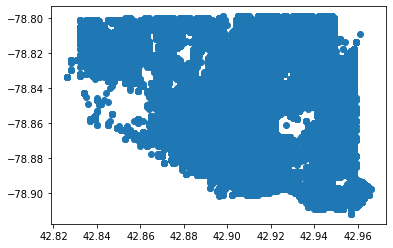

In [23]:
import matplotlib.pyplot as plt
plt.scatter(geo_locs['Latitude'], geo_locs['Longitude'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'savfig'

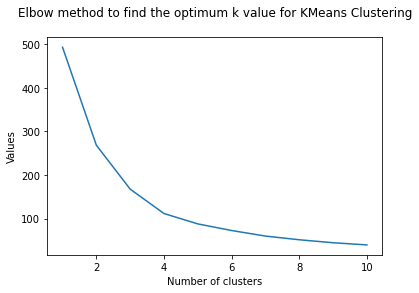

In [112]:
#performing elbow method to find the optimum k value to perform kmeans
from sklearn.cluster import KMeans
inertia_values = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'random')
    km.fit(geo_locs)
    inertia_values.append(km.inertia_)
    
plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Values')
plt.title('Elbow method to find the optimum k value for KMeans Clustering\n')
plt.show()

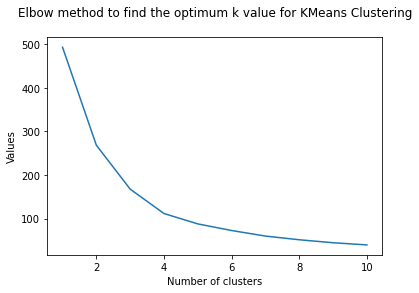

In [114]:
plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Values')
plt.title('Elbow method to find the optimum k value for KMeans Clustering\n')
#plt.savefig('elbow_method')
plt.show()

In [50]:
#lets try with 6 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
km.fit(geo_locs)

KMeans(n_clusters=4)

In [51]:
pred = km.predict(geo_locs)

In [52]:
cluster_centers = km.cluster_centers_

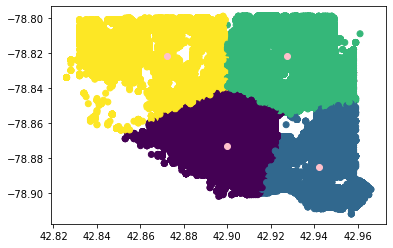

In [115]:
#plotting results
plt.scatter(geo_locs['Latitude'], geo_locs['Longitude'], c=pred)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = 'pink')
#plt.savefig('clusters_plot.png')
plt.show()

In [54]:
#seperating each cluster points
data.drop(data.index[data['Latitude'] == 0.000], inplace = True)
#geo_locs.value_counts()

cluster_points = pd.DataFrame()
cluster_points['data_indexes'] = data.index.values
cluster_points['lables'] = km.labels_
cluster_points

,data_indexes,lables
0,0,3
1,1,0
2,2,3
3,3,2
4,4,0
...,...,...
276081,280545,2
276082,280546,1
276083,280547,3
276084,280548,0


In [55]:
first_cluster = cluster_points[cluster_points.lables == 0]
second_cluster = cluster_points[cluster_points.lables == 1]
third_cluster = cluster_points[cluster_points.lables == 2]
fourth_cluster = cluster_points[cluster_points.lables == 3]
#fifth_cluster = cluster_points[cluster_points.lables == 5]
#sixth_cluster = cluster_points[cluster_points.lables == 0]

In [56]:
first_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][first_cluster.data_indexes])
second_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][second_cluster.data_indexes])
third_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][third_cluster.data_indexes])
fourth_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][fourth_cluster.data_indexes])
#fifth_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][fifth_cluster.data_indexes])
#sixth_cluster_incidents = pd.DataFrame(data['Parent Incident Type'][sixth_cluster.data_indexes])


In [57]:
def get_incident_freqs(df):
    typ = np.unique(df)
    freqs = []
    size = int((np.unique(df)).shape[0])
    for i in range(size):
        freqs.append(df.pivot_table(columns=['Parent Incident Type'], aggfunc='size')[i])
        
    inci_freqs = pd.DataFrame()
    inci_freqs['Incident Type'] = typ
    inci_freqs['Frequency'] = freqs    


    return inci_freqs

In [58]:
first_cluster_incidents = get_incident_freqs(first_cluster_incidents)
second_cluster_incidents = get_incident_freqs(second_cluster_incidents)
third_cluster_incidents = get_incident_freqs(third_cluster_incidents)
fourth_cluster_incidents = get_incident_freqs(fourth_cluster_incidents)
#fifth_cluster_incidents = get_incident_freqs(fifth_cluster_incidents)
#sixth_cluster_incidents = get_incident_freqs(sixth_cluster_incidents)


In [59]:
def append_lat_lon_inci(df):
    lat = np.array(data.loc[df.data_indexes, 'Latitude'])
    long = np.array(data.loc[df.data_indexes, 'Longitude'])
    inci_type = np.array(data.loc[df.data_indexes, 'Parent Incident Type'])
    
    df['Latitude'] = lat
    df['Longitude'] = long
    df['Parent Incident Type'] = inci_type

    return df

In [60]:
first_cluster = append_lat_lon_inci(first_cluster)
second_cluster = append_lat_lon_inci(second_cluster)
third_cluster = append_lat_lon_inci(third_cluster)
fourth_cluster = append_lat_lon_inci(fourth_cluster)
#fifth_cluster = append_lat_lon_inci(fifth_cluster)
#sixth_cluster = append_lat_lon_inci(sixth_cluster)

C:\Users\91767\AppData\Local\Temp/ipykernel_25884/165425340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = lat
C:\Users\91767\AppData\Local\Temp/ipykernel_25884/165425340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = long
C:\Users\91767\AppData\Local\Temp/ipykernel_25884/165425340.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [61]:
data['Parent Incident Type'].value_counts()

Theft                   120127
Assault                  56818
Breaking & Entering      52599
Theft of Vehicle         22623
Robbery                  17893
Sexual Assault            2460
Other Sexual Offense      2220
Homicide                   947
Sexual Offense             399
Name: Parent Incident Type, dtype: int64

In [62]:
from pathlib import Path
def file_save(df, name):
    #path = 'r'+''C:\Users\91767\Documents\Python Scripts\Data Mining\Project\''
    filepath = Path(r'C:\Users\91767\Documents\Python Scripts\Data Mining\Project\''+name)
    filepath.parent.mkdir(parents = True, exist_ok = True)
    df.to_csv(filepath)

In [63]:
file_save(first_cluster, 'first_cluster.csv')
file_save(second_cluster, 'second_cluster.csv')
file_save(third_cluster, 'third_cluster.csv')
file_save(fourth_cluster, 'fourth_cluster.csv')
#file_save(fifth_cluster, 'fifth_cluster.csv')
#file_save(sixth_cluster, 'sixth_cluster.csv')

In [64]:
file_save(first_cluster_incidents, 'first_cluster_incidents.csv')
file_save(second_cluster_incidents, 'second_cluster_incidents.csv')
file_save(third_cluster_incidents, 'third_cluster_incidents.csv')
file_save(fourth_cluster_incidents, 'fourth_cluster_incidents.csv')
#file_save(fifth_cluster_incidents, 'fifth_cluster_incidents.csv')
#file_save(sixth_cluster_incidents, 'sixth_cluster_incidents.csv')

In [65]:
first_cluster

,data_indexes,lables,Latitude,Longitude,Parent Incident Type
1,1,0,42.896,-78.886,Assault
4,4,0,42.874,-78.871,Robbery
7,7,0,42.907,-78.854,Theft
16,16,0,42.887,-78.873,Robbery
22,25,0,42.917,-78.863,Theft
...,...,...,...,...,...
276072,280536,0,42.885,-78.863,Assault
276076,280540,0,42.881,-78.873,Assault
276077,280541,0,42.920,-78.881,Theft
276080,280544,0,42.896,-78.888,Breaking & Entering


In [66]:
first_cluster_incidents

,Incident Type,Frequency
0,Assault,16647
1,Breaking & Entering,13646
2,Homicide,247
3,Other Sexual Offense,615
4,Robbery,5438
5,Sexual Assault,833
6,Sexual Offense,109
7,Theft,41306
8,Theft of Vehicle,6525


In [67]:
cluster_points.lables.value_counts()

2    89519
0    85366
1    51285
3    49916
Name: lables, dtype: int64

([<matplotlib.patches.Wedge at 0x184b3fc1b50>,
 [Text(0.8999500167108047, 0.6325266535271242, 'Assault'),
  Text(-0.17162609063281878, 1.086528639757874, 'Breaking & Entering'),
  Text(-0.6813124528223089, 0.8636048527128881, 'Homicide'),
  Text(-0.7083610787054436, 0.8415608012349794, 'Other Sexual Offense'),
  Text(-0.8767774507401345, 0.6642750197573526, 'Robbery'),
  Text(-1.0054776302715704, 0.4461106757559914, 'Sexual Assault'),
  Text(-1.0203357067782588, 0.4109927559864181, 'Sexual Offense'),
  Text(-0.458141248012202, -1.0000532970146252, 'Theft'),
  Text(1.0684379119548117, -0.2616112159247801, 'Theft of Vehicle')],
 [Text(0.49088182729680246, 0.34501453828752227, '19.5%'),
  Text(-0.09361423125426478, 0.5926519853224766, '16.0%'),
  Text(-0.37162497426671387, 0.471057192388848, '0.3%'),
  Text(-0.3863787702029692, 0.45903316430998875, '0.7%'),
  Text(-0.4782422458582551, 0.3623318289585559, '6.4%'),
  Text(-0.5484423437844929, 0.24333309586690438, '1.0%'),
  Text(-0.55654674

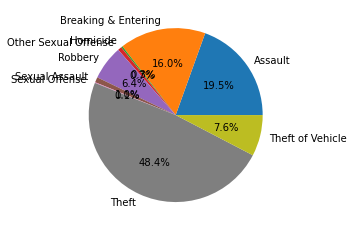

In [68]:
plt.pie(first_cluster_incidents['Frequency'], labels = first_cluster_incidents['Incident Type'], autopct='%1.1f%%')

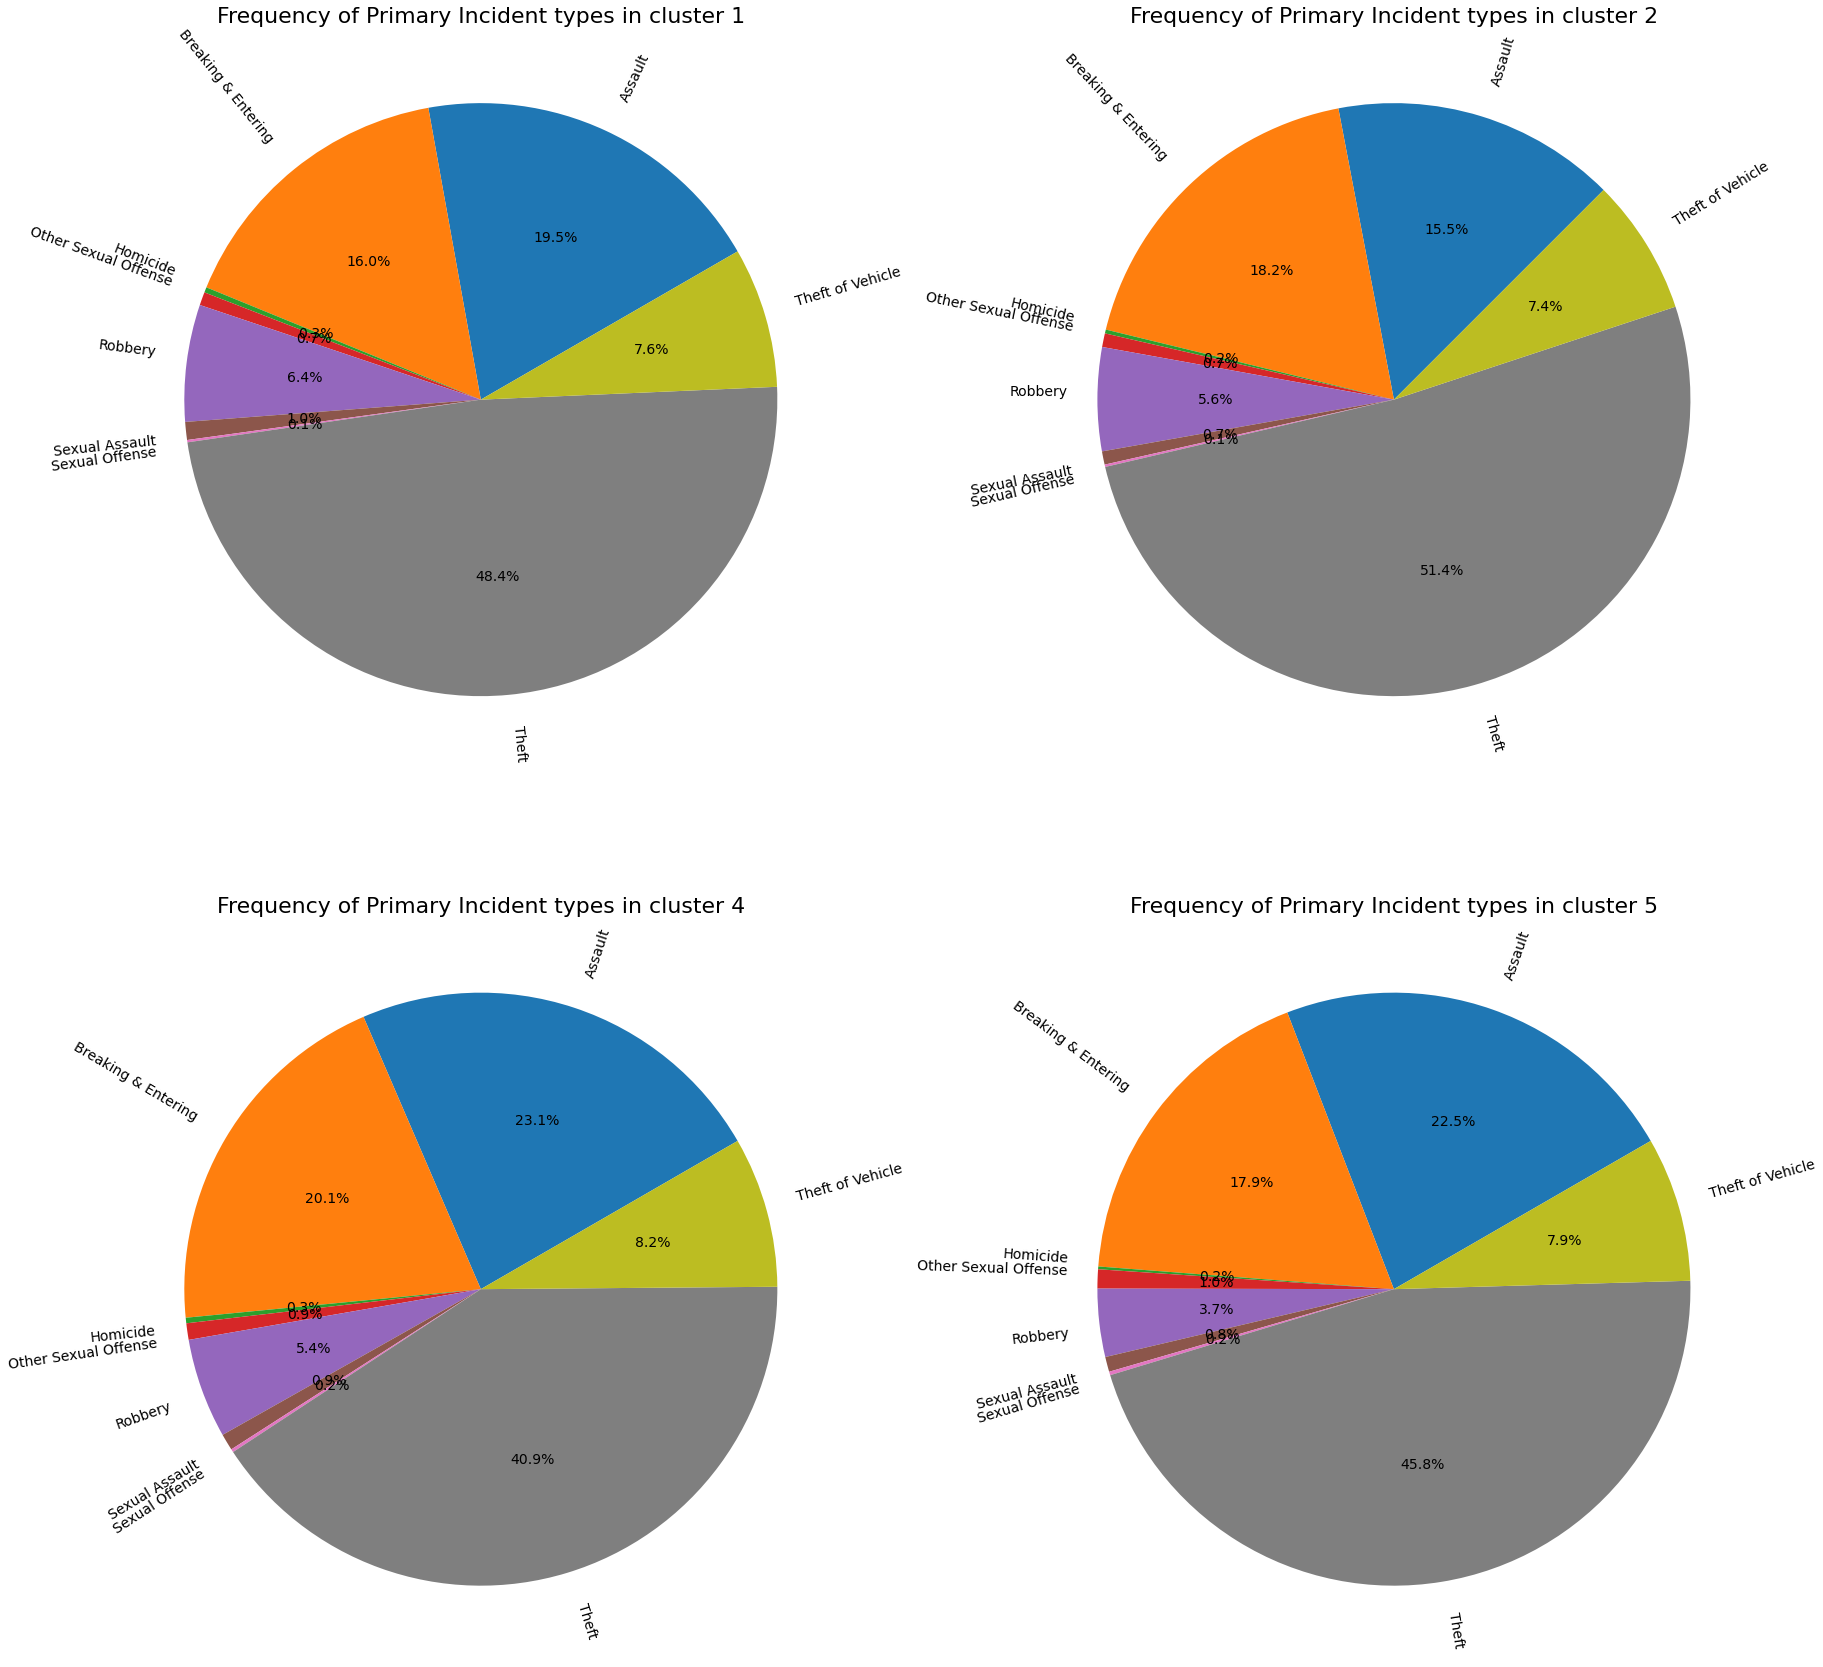

In [107]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))
axes[0][0].pie(first_cluster_incidents['Frequency'], labels = first_cluster_incidents['Incident Type'], rotatelabels = 60, startangle = 30, autopct='%1.1f%%', textprops={'fontsize': 14})
axes[0][0].set_title('Frequency of Primary Incident types in cluster 1', fontsize = 22)

axes[0][1].pie(second_cluster_incidents['Frequency'], labels = second_cluster_incidents['Incident Type'], rotatelabels = 60, startangle = 45, autopct='%1.1f%%', textprops={'fontsize': 14})
axes[0][1].set_title('Frequency of Primary Incident types in cluster 2', fontsize = 22)

# axes[0][2].pie(third_cluster_incidents['Frequency'], labels = third_cluster_incidents['Incident Type'], autopct='%1.1f%%', textprops={'fontsize': 14})
# axes[0][2].set_title('Frequency of Primary Incident types in cluster 3', fontsize = 22)


axes[1][0].pie(fourth_cluster_incidents['Frequency'], labels = fourth_cluster_incidents['Incident Type'], rotatelabels = 60, startangle = 30, autopct='%1.1f%%', textprops={'fontsize': 14})
axes[1][0].set_title('Frequency of Primary Incident types in cluster 4', fontsize = 22)


axes[1][1].pie(fifth_cluster_incidents['Frequency'], labels = fifth_cluster_incidents['Incident Type'], rotatelabels = 60, startangle = 30, autopct='%1.1f%%', textprops={'fontsize': 14})
axes[1][1].set_title('Frequency of Primary Incident types in cluster 5', fontsize = 22)


# axes[1][2].pie(sixth_cluster_incidents['Frequency'], labels = sixth_cluster_incidents['Incident Type'], autopct='%1.1f%%', textprops={'fontsize': 14})
# axes[1][2].set_title('Frequency of Primary Incident types in cluster 6', fontsize = 22)
plt.savefig('pie_charts_of_each_clusters.png', format = 'png')
plt.show()


In [98]:
plt.savefig('Pie_charts.jpg')

<Figure size 432x288 with 0 Axes>

C:\Users\91767\AppData\Local\Temp/ipykernel_25884/3014430058.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(first_cluster_incidents['Incident Type'], rotation = 60)
C:\Users\91767\AppData\Local\Temp/ipykernel_25884/3014430058.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_xticklabels(second_cluster_incidents['Incident Type'], rotation = 60)
C:\Users\91767\AppData\Local\Temp/ipykernel_25884/3014430058.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(fourth_cluster_incidents['Incident Type'], rotation = 60)
C:\Users\91767\AppData\Local\Temp/ipykernel_25884/3014430058.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(fifth_cluster_incidents['Incident Type'], rotation = 60)


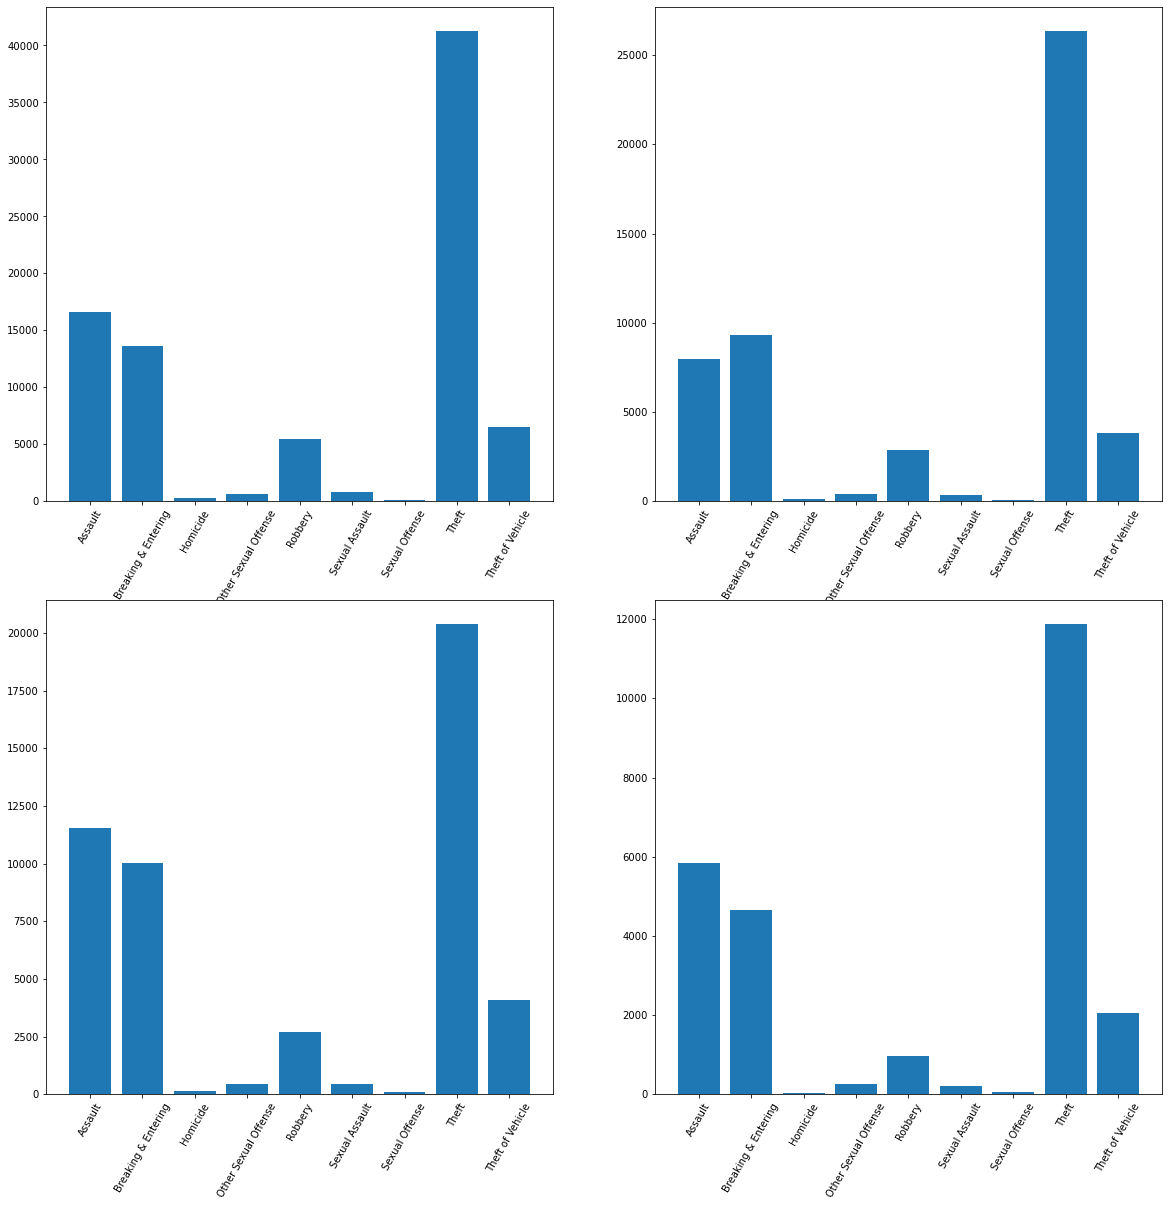

In [106]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))

axes[0][0].bar(first_cluster_incidents['Incident Type'], first_cluster_incidents['Frequency'])
axes[0][0].set_xticklabels(first_cluster_incidents['Incident Type'], rotation = 60)

axes[0][1].bar(second_cluster_incidents['Incident Type'], second_cluster_incidents['Frequency'])
axes[0][1].set_xticklabels(second_cluster_incidents['Incident Type'], rotation = 60)

# axes[0][2].bar(third_cluster_incidents['Incident Type'], third_cluster_incidents['Frequency'])
# axes[0][2].set_xticklabels(third_cluster_incidents['Incident Type'], rotation = 60)

axes[1][0].bar(fourth_cluster_incidents['Incident Type'], fourth_cluster_incidents['Frequency'])
axes[1][0].set_xticklabels(fourth_cluster_incidents['Incident Type'], rotation = 60)

axes[1][1].bar(fifth_cluster_incidents['Incident Type'], fifth_cluster_incidents['Frequency'])
axes[1][1].set_xticklabels(fifth_cluster_incidents['Incident Type'], rotation = 60)

# axes[1][2].bar(sixth_cluster_incidents['Incident Type'], sixth_cluster_incidents['Frequency'])
# axes[1][2].set_xticklabels(sixth_cluster_incidents['Incident Type'], rotation = 60)
plt.savefig('bar_plots_of_each_clusters.png', format = 'png')
plt.show()


In [83]:
data.loc[third_cluster.data_indexes, 'Neighborhood'].value_counts()

Kensington-Bailey     14468
Schiller Park         11804
University Heights    10502
Kenfield               9944
Genesee-Moselle        9883
Delavan Grider         7155
Fillmore-Leroy         6647
MLK Park               5828
Hamlin Park            3481
Central Park           3255
Parkside               2751
Broadway Fillmore      1947
North Park             1119
Masten Park             735
Name: Neighborhood, dtype: int64

In [48]:
data.loc[0, 'Neighborhood']

'Broadway Fillmore'

In [49]:
data.columns

Index(['Incident Datetime', 'Incident Type Primary', 'Incident Description',
       'Parent Incident Type', 'Hour of Day', 'Day of Week', 'Address', 'City',
       'State', 'Location', 'Latitude', 'Longitude', 'Created At',
       '2010 Census Tract ', '2010 Census Block Group', '2010 Census Block',
       'Census Tract', 'Census Block', 'Census Block Group', 'Neighborhood',
       'Police District', 'Council District', 'TRACTCE20', 'GEOID20_tract',
       'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')

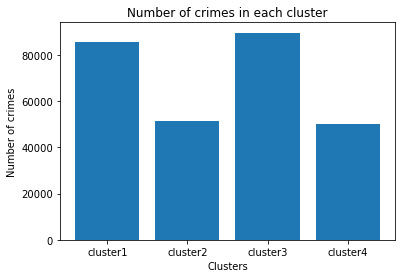

In [116]:
plt.bar(['cluster1', 'cluster2', 'cluster3', 'cluster4'], [first_cluster.shape[0], second_cluster.shape[0], third_cluster.shape[0], fourth_cluster.shape[0]])
plt.xlabel('Clusters')
plt.ylabel('Number of crimes')
plt.title('Number of crimes in each cluster')
plt.savefig('Cluster_vs_ncrimes.png', format = 'png', dpi=100)
plt.show()

In [85]:
first_cluster.shape[0]

85366

In [111]:
data[["Parent Incident Type", "Day of Week"]].groupby(["Parent Incident Type", "Day of Week"]).size()


Parent Incident Type  Day of Week
Assault               Friday         7886
                      Monday         7269
                      Saturday       9665
                      Sunday         9781
                      Thursday       7415
                                     ... 
Theft of Vehicle      Saturday       3655
                      Sunday         3192
                      Thursday       3157
                      Tuesday        3026
                      Wednesday      3061
Length: 63, dtype: int64